In [1]:
# Data from statsbomb and using pandas dataframes
import statsbomb as sb
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
#import scikitplot as skplt
 
# Machine learning
from sklearn import preprocessing, model_selection, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.feature_selection import RFE
#from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Get all competitions
competitions = sb.Competitions()
 
# Get json data
json_data = competitions.data
 
# Convert to dataframe
df = competitions.get_dataframe()

In [3]:
# Showing the competitions
# We will find and pick the data for World Cup 2018
df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2021-06-22T21:17:46.381,2021-06-13T16:17:31.694,None,2021-06-22T21:17:46.381
9,16,21,Europe,Champions League,male,False,False,2009/2010,2021-06-22T21:24:20.506,2021-06-13T16:17:31.694,None,2021-06-22T21:24:20.506


In [4]:
# Get all matches
#all_matches = pd.DataFrame()
#count = 0
#for i in range(len(df)):
#    comp_id = df.iloc[i]['competition_id']
#    season_id = df.iloc[i]['season_id']
#    if(str(comp_id) == '16' and str(season_id) == '76'): # this competition returns an error so we continue
#        continue
#    comp_df = sb.Matches(event_id = comp_id, season_id = season_id).get_dataframe()
#    print(comp_df)
#    print("---")
#    all_matches = all_matches.append(comp_df)
#    count += 1

In [5]:
#count # so 39 of the 40 competitions were extracted

In [6]:
#all_matches

In [7]:
#all_matches.to_csv('/Users/saejin123/Documents/all_matches.csv', index = False, header = True) # save csv

In [8]:
# But we want to focus on shots and goals
# Create a list of all match ids for the matches in the euros
#match_list = all_matches['match_id'].tolist()
 
# Create an empty dataframe to add all shots
#shots_df = pd.DataFrame()
 
# Loop through and add all shots from every match to the empty dataframe
'''for i in match_list:
    events = sb.Events(event_id=str(i))
    shot = events.get_dataframe(event_type='shot')
    shots_df = shots_df.append(shot)'''

#for i in match_list:
#    events = sb.Events(event_id=str(i))
#    shot = events.get_dataframe(event_type='shot')
#    shots_df = shots_df.append(shot)

"for i in match_list:\n    events = sb.Events(event_id=str(i))\n    shot = events.get_dataframe(event_type='shot')\n    shots_df = shots_df.append(shot)"

In [9]:
#shots_df.to_csv('/Users/saejin123/Documents/shots_df.csv', index = False, header = True) # oh definately save this csv

In [10]:
shots_df = pd.read_csv('/Users/saejin123/Documents/shots_df.csv')


In [11]:
shots_df

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,follows_dribble,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z
0,shot,642e3db4-bfa4-4ed2-9a22-468e68bd6e0a,34,1,00:01:48.568,1,48,3,Liverpool,Other,...,NaN,NaN,NaN,NaN,NaN,108.2,40.1,120.0,42.5,0.9
1,shot,93adc671-0697-4ad0-8f30-6dea062f3b03,342,1,00:09:04.723,9,4,15,Tottenham Hotspur,Regular Play,...,NaN,NaN,NaN,NaN,NaN,91.9,43.1,120.0,46.5,5.2
2,shot,e18a3a5e-b587-43f3-8dea-a25a14517c14,587,1,00:16:48.573,16,48,25,Liverpool,From Throw In,...,NaN,NaN,NaN,NaN,NaN,90.2,59.3,120.0,34.7,0.8
3,shot,2439947c-b340-48a3-a8fe-b4e217136ccd,758,1,00:20:31.085,20,31,35,Liverpool,From Keeper,...,NaN,NaN,NaN,NaN,NaN,95.2,47.2,99.7,46.2,NaN
4,shot,7c1825a8-ff22-4d87-9a58-b287f0f3104a,768,1,00:21:53.381,21,53,37,Liverpool,From Throw In,...,NaN,NaN,NaN,NaN,NaN,113.0,59.5,113.2,0.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27736,shot,3e767b66-7e5a-428e-a4a8-26af57a7639b,2060,2,00:14:29.178,59,29,118,United States Women's,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,96.3,36.2,120.0,39.1,3.5
27737,shot,97ea84d3-d429-48a4-9664-a2c2d489da12,2212,2,00:19:07.871,64,7,126,United States Women's,From Throw In,...,NaN,NaN,NaN,NaN,NaN,98.5,24.3,120.0,47.1,1.4
27738,shot,746bc451-30af-477a-b824-293543017741,2228,2,00:19:59.455,64,59,128,Spain Women's,From Throw In,...,NaN,NaN,NaN,NaN,NaN,102.9,54.6,120.0,45.1,5.2
27739,shot,a5a87567-a946-4860-9f5f-75436339c59d,2433,2,00:30:36.196,75,36,138,United States Women's,Other,...,NaN,NaN,NaN,NaN,NaN,108.0,40.0,120.0,36.3,0.2


In [12]:
shots_df.columns

Index(['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'possession_team', 'play_pattern', 'off_camera', 'team',
       'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg',
       'key_pass_id', 'body_part', 'type', 'outcome', 'technique',
       'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal',
       'deflected', 'start_location_x', 'start_location_y', 'end_location_x',
       'end_location_y', 'end_location_z'],
      dtype='object')

In [13]:
# Details on our data
print(len(shots_df), "is the total number of shots from every match from all the competitions provided except 1999/2000 mens Champions League")
print("--------------------")
 
print("Columns:")
print(list(shots_df))
print("--------------------")
 
print("Unique values:")
print(shots_df['type'].unique())
print("--------------------")
 
print("Unique values in the 'play_pattern' column:")
print(shots_df['play_pattern'].unique())

print(shots_df['body_part'].unique())

27741 is the total number of shots from every match from all the competitions provided except 1999/2000 mens Champions League
--------------------
Columns:
['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 'possession_team', 'play_pattern', 'off_camera', 'team', 'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg', 'key_pass_id', 'body_part', 'type', 'outcome', 'technique', 'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'start_location_x', 'start_location_y', 'end_location_x', 'end_location_y', 'end_location_z']
--------------------
Unique values:
['Penalty' 'Open Play' 'Free Kick' 'Corner' 'Kick Off']
--------------------
Unique values in the 'play_pattern' column:
['Other' 'Regular Play' 'From Throw In' 'From Keeper' 'From Corner'
 'From Counter' 'From Free Kick' 'From Goal Kick' 'From Kick Off']
['Left Foot' 'Right Foot' 'Head' 'Other']


In [14]:
# Remove penalties from the data since they are misleading in our analysis of shots
nopen_shots = shots_df[shots_df['type'] != 'Penalty']
#nopen_shots.to_csv('/Users/saejin123/Documents/npshots_df.csv', index = False, header = True) # oh definately save this csv too (this is the data we will use)

In [15]:
nopen_shots.columns

Index(['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'possession_team', 'play_pattern', 'off_camera', 'team',
       'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg',
       'key_pass_id', 'body_part', 'type', 'outcome', 'technique',
       'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal',
       'deflected', 'start_location_x', 'start_location_y', 'end_location_x',
       'end_location_y', 'end_location_z'],
      dtype='object')

In [16]:
nopen_shots # non penalty shots

,event_type,id,index,period,timestamp,minute,second,possession,possession_team,play_pattern,...,follows_dribble,redirect,one_on_one,open_goal,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z
1,shot,93adc671-0697-4ad0-8f30-6dea062f3b03,342,1,00:09:04.723,9,4,15,Tottenham Hotspur,Regular Play,...,NaN,NaN,NaN,NaN,NaN,91.9,43.1,120.0,46.5,5.2
2,shot,e18a3a5e-b587-43f3-8dea-a25a14517c14,587,1,00:16:48.573,16,48,25,Liverpool,From Throw In,...,NaN,NaN,NaN,NaN,NaN,90.2,59.3,120.0,34.7,0.8
3,shot,2439947c-b340-48a3-a8fe-b4e217136ccd,758,1,00:20:31.085,20,31,35,Liverpool,From Keeper,...,NaN,NaN,NaN,NaN,NaN,95.2,47.2,99.7,46.2,NaN
4,shot,7c1825a8-ff22-4d87-9a58-b287f0f3104a,768,1,00:21:53.381,21,53,37,Liverpool,From Throw In,...,NaN,NaN,NaN,NaN,NaN,113.0,59.5,113.2,0.1,NaN
5,shot,c678b67c-9658-4d7d-9a9b-d3db9a378829,1347,1,00:37:48.966,37,48,65,Liverpool,Regular Play,...,NaN,NaN,NaN,NaN,NaN,98.4,20.4,118.3,37.9,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27735,shot,0458b135-c2f2-4ae5-813e-e182023add16,1851,2,00:07:58.324,52,58,109,Spain Women's,From Counter,...,NaN,NaN,NaN,NaN,NaN,100.3,52.5,101.1,52.1,NaN
27736,shot,3e767b66-7e5a-428e-a4a8-26af57a7639b,2060,2,00:14:29.178,59,29,118,United States Women's,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,96.3,36.2,120.0,39.1,3.5
27737,shot,97ea84d3-d429-48a4-9664-a2c2d489da12,2212,2,00:19:07.871,64,7,126,United States Women's,From Throw In,...,NaN,NaN,NaN,NaN,NaN,98.5,24.3,120.0,47.1,1.4
27738,shot,746bc451-30af-477a-b824-293543017741,2228,2,00:19:59.455,64,59,128,Spain Women's,From Throw In,...,NaN,NaN,NaN,NaN,NaN,102.9,54.6,120.0,45.1,5.2


In [17]:
from matplotlib.patches import Arc

In [18]:
# plotting shots on to a pitch

def pitch_creator(size=(10,6)):
    with plt.style.context('bmh'):
        fig = plt.figure(figsize=size)
        plt.axis([60, 125, -10, 90])
        plt.grid(False)


        plt.plot([60, 60], [0, 80], color='black')
        plt.plot([120, 120], [0, 80], color="black")
        plt.plot([60, 120], [0, 0], color='black')
        plt.plot([60, 120], [80, 80], color='black')

        centreCircle = plt.Circle((60, 40), 10, color='black', fill=False)

        # right penalty area
        plt.plot([120, 102], [18, 18], color='black')
        plt.plot([102, 102], [18, 62], color='black')
        plt.plot([102, 120], [62, 62], color='black')

        # right six yard box
        plt.plot([120, 114], [30, 30], color='black')
        plt.plot([114, 114], [30, 50], color='black')
        plt.plot([114, 120], [50, 50], color='black')


        # right goal posts
        plt.plot([120, 122], [36, 36], color='black')
        plt.plot([120, 122], [44, 44], color='black')
        plt.plot([122, 122], [36, 44], color='black')


        # right Arc
        rightArc = Arc((108, 40), height=18.3, width=18.3, angle=0,
                       theta1=130, theta2=230, color='red')

        ax = plt.gca()
        ax.add_patch(centreCircle)
        ax.add_patch(rightArc)
        ax.set_ylim(ax.get_ylim()[::-1])
        return fig

def plotter(fig,loc_list,color,label):
    
    loc_x=[]
    loc_y=[]
    for loc in loc_list:
        loc_x.append(loc[0])
        loc_y.append(loc[1])
            
    plt.scatter(loc_x,loc_y,c=color,alpha=0.6,label=label,edgecolor='black',linewidth=0.5)
    plt.axis('off')
    
    
    return fig

In [19]:
nopen_shots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27289 entries, 1 to 27740
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   event_type        27289 non-null  object 
 1   id                27289 non-null  object 
 2   index             27289 non-null  int64  
 3   period            27289 non-null  int64  
 4   timestamp         27289 non-null  object 
 5   minute            27289 non-null  int64  
 6   second            27289 non-null  int64  
 7   possession        27289 non-null  int64  
 8   possession_team   27289 non-null  object 
 9   play_pattern      27289 non-null  object 
 10  off_camera        32 non-null     object 
 11  team              27289 non-null  object 
 12  player            27289 non-null  object 
 13  position          27289 non-null  object 
 14  duration          27289 non-null  float64
 15  under_pressure    4983 non-null   object 
 16  statsbomb_xg      27289 non-null  float6

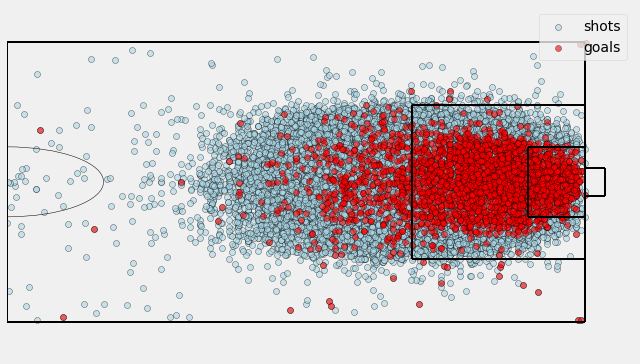

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 15
plt.style.use('fivethirtyeight')
#plotting all data
plt1 = pitch_creator()
plt1 = plotter(plt,nopen_shots[['start_location_x','start_location_y']].values,'lightblue','shots')
plt1 = plotter(plt,nopen_shots[nopen_shots['outcome']=='Goal'][['start_location_x','start_location_y']].values,'red','goals')
plt.legend(loc='upper right')
# plt.show()
plt.savefig('overallpitchmap.png')

In [21]:
# Create a goal column, where 1 = goal and 0 = no goal
nopen_shots['goal'] = np.where(nopen_shots['outcome'] == 'Goal', 1, 0)

<ipython-input-21-37cc296265a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nopen_shots['goal'] = np.where(nopen_shots['outcome'] == 'Goal', 1, 0)


In [22]:
nopen_shots

,event_type,id,index,period,timestamp,minute,second,...,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z,goal
1,shot,93adc671-0697-4ad0-8f30-6dea062f3b03,342,1,00:09:04.723,9,4,...,NaN,91.9,43.1,120.0,46.5,5.2,0
2,shot,e18a3a5e-b587-43f3-8dea-a25a14517c14,587,1,00:16:48.573,16,48,...,NaN,90.2,59.3,120.0,34.7,0.8,0
3,shot,2439947c-b340-48a3-a8fe-b4e217136ccd,758,1,00:20:31.085,20,31,...,NaN,95.2,47.2,99.7,46.2,NaN,0
4,shot,7c1825a8-ff22-4d87-9a58-b287f0f3104a,768,1,00:21:53.381,21,53,...,NaN,113.0,59.5,113.2,0.1,NaN,0
5,shot,c678b67c-9658-4d7d-9a9b-d3db9a378829,1347,1,00:37:48.966,37,48,...,NaN,98.4,20.4,118.3,37.9,2.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27735,shot,0458b135-c2f2-4ae5-813e-e182023add16,1851,2,00:07:58.324,52,58,...,NaN,100.3,52.5,101.1,52.1,NaN,0
27736,shot,3e767b66-7e5a-428e-a4a8-26af57a7639b,2060,2,00:14:29.178,59,29,...,NaN,96.3,36.2,120.0,39.1,3.5,0
27737,shot,97ea84d3-d429-48a4-9664-a2c2d489da12,2212,2,00:19:07.871,64,7,...,NaN,98.5,24.3,120.0,47.1,1.4,0
27738,shot,746bc451-30af-477a-b824-293543017741,2228,2,00:19:59.455,64,59,...,NaN,102.9,54.6,120.0,45.1,5.2,0


In [23]:
# Show data
nopen_shots.head()

,event_type,id,index,period,timestamp,minute,second,...,deflected,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z,goal
1,shot,93adc671-0697-4ad0-8f30-6dea062f3b03,342,1,00:09:04.723,9,4,...,NaN,91.9,43.1,120.0,46.5,5.2,0
2,shot,e18a3a5e-b587-43f3-8dea-a25a14517c14,587,1,00:16:48.573,16,48,...,NaN,90.2,59.3,120.0,34.7,0.8,0
3,shot,2439947c-b340-48a3-a8fe-b4e217136ccd,758,1,00:20:31.085,20,31,...,NaN,95.2,47.2,99.7,46.2,NaN,0
4,shot,7c1825a8-ff22-4d87-9a58-b287f0f3104a,768,1,00:21:53.381,21,53,...,NaN,113.0,59.5,113.2,0.1,NaN,0
5,shot,c678b67c-9658-4d7d-9a9b-d3db9a378829,1347,1,00:37:48.966,37,48,...,NaN,98.4,20.4,118.3,37.9,2.4,0


In [24]:
nopen_shots.describe()

,index,period,minute,second,possession,duration,statsbomb_xg,start_location_x,start_location_y,end_location_x,end_location_y,end_location_z,goal
count,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,27289.000000,19503.000000,27289.000000
mean,1928.639159,1.548170,48.389901,29.380556,103.431896,0.831098,0.107703,103.832170,39.715545,115.838528,39.960442,1.784136,0.114258
std,1054.845295,0.527009,26.968013,17.321535,57.237419,0.574665,0.136146,8.861335,9.962461,6.463524,6.742007,1.747412,0.318131
min,7.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,40.000000,0.400000,66.500000,0.100000,0.000000,0.000000
25%,1040.000000,1.000000,25.000000,14.000000,55.000000,0.381400,0.026487,97.700000,32.100000,114.000000,36.300000,0.400000,0.000000
50%,1949.000000,2.000000,49.000000,29.000000,104.000000,0.765291,0.053308,105.100000,39.800000,119.000000,39.900000,1.200000,0.000000
75%,2781.000000,2.000000,71.000000,44.000000,150.000000,1.160410,0.127057,111.000000,47.000000,120.000000,43.700000,2.500000,0.000000
max,4988.000000,4.000000,123.000000,59.000000,294.000000,6.150651,0.958827,120.100000,79.500000,120.000000,80.000000,7.800000,1.000000


In [25]:
len(nopen_shots)

27289

In [26]:
nopen_shots.iloc[0]

event_type                                          shot
id                  93adc671-0697-4ad0-8f30-6dea062f3b03
index                                                342
period                                                 1
timestamp                                   00:09:04.723
minute                                                 9
second                                                 4
possession                                            15
possession_team                        Tottenham Hotspur
play_pattern                                Regular Play
off_camera                                           NaN
team                                   Tottenham Hotspur
player                                    Moussa Sissoko
position                        Right Defensive Midfield
duration                                         1.23704
under_pressure                                      True
statsbomb_xg                                   0.0187684
key_pass_id                    

In [27]:
# Calculating average shot conversion rate
attempts = len(nopen_shots)
goals = sum(nopen_shots['goal'])
misses = attempts - goals
conversion_rate = goals / attempts
print('Average conversion rate: ',round(conversion_rate*100,2),"%")

Average conversion rate:  11.43 %


<AxesSubplot:xlabel='goal', ylabel='count'>

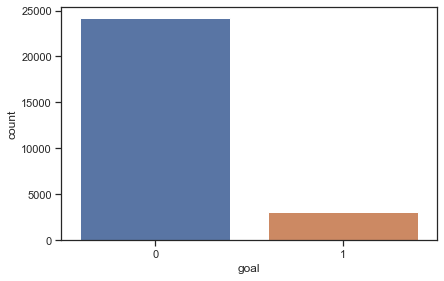

In [28]:
# Show graph
# We see that most shots end up not being being a goal
sns.set(style="ticks", color_codes=True)
sns.countplot(x="goal", data=nopen_shots)

In [29]:
# Feature engineering - Make new variables out of the raw data to improve model
# Resetting index
nopen_shots = nopen_shots.reset_index().drop('level_0', axis=1)
 
# Our new variables: distance
# Length of soccer field is 120 units long and width is 80 units wide
# Use distance formula and angle from the centre of the goal being scored on ,at (120, 40), to location of shot
nopen_shots['x_distance'] = 120 - nopen_shots['start_location_x']
nopen_shots['y_distance'] = abs(40 - nopen_shots['start_location_y'])
nopen_shots['distance'] = np.sqrt((nopen_shots['x_distance']**2 + nopen_shots['y_distance']**2))

# If we know the player's weak and strong foot, we can make look at these data individually
nopen_shots['body_part'] = np.where((nopen_shots['body_part'] == 'Right Foot')
                                 | (nopen_shots['body_part'] == 'Left Foot'), 'foot',
                                np.where(nopen_shots['body_part'] == 'Head', 'head', 'other'))

#Calculate angle of shot 
# Value is provided from Statsbomb dataset a and b value are the two edges of the goalpost ; c is the difference 44-36 = 8
nopen_shots['a_value'] = np.sqrt(((nopen_shots['start_location_y']-36)**2 + (nopen_shots['start_location_x']-120)**2))
nopen_shots['b_value'] = np.sqrt(((nopen_shots['start_location_y']-44)**2 + (nopen_shots['start_location_x']-120)**2))
nopen_shots['shot_angle'] = np.arccos((nopen_shots['a_value']**2+nopen_shots['b_value']**2-8**2)/(2*nopen_shots['a_value']*nopen_shots['b_value']))

#Convert to degrees
nopen_shots['shot_angle'] = np.degrees(nopen_shots['shot_angle'])
#Round to 1 
nopen_shots['shot_angle'] = round(nopen_shots['shot_angle'],1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
nopen_shots.columns

Index(['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'possession_team', 'play_pattern', 'off_camera', 'team',
       'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg',
       'key_pass_id', 'body_part', 'type', 'outcome', 'technique',
       'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal',
       'deflected', 'start_location_x', 'start_location_y', 'end_location_x',
       'end_location_y', 'end_location_z', 'goal', 'x_distance', 'y_distance',
       'distance', 'a_value', 'b_value', 'shot_angle'],
      dtype='object')

In [31]:
# Show features
# As you can see, we have the new variables of distance and angle and have filled up NA values with 0
# We have the relevant and useful information we nee

In [32]:
# Find model features in cols
feature_cols = ['play_pattern', 'under_pressure', 'body_part', 'technique', 'first_time',
                'follows_dribble', 'redirect', 'one_on_one', 'open_goal', 'deflected', 'distance', 'shot_angle']


features = nopen_shots[feature_cols]
# Find model labels
labels = nopen_shots['goal']


In [33]:
features

,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,distance,shot_angle
0,Regular Play,True,foot,Normal,NaN,NaN,NaN,NaN,NaN,NaN,28.270479,16.0
1,From Throw In,NaN,foot,Normal,NaN,NaN,NaN,NaN,NaN,NaN,35.503943,10.8
2,From Keeper,NaN,foot,Normal,NaN,NaN,NaN,NaN,NaN,NaN,25.824020,17.0
3,From Throw In,NaN,foot,Normal,NaN,NaN,NaN,NaN,NaN,NaN,20.718349,7.7
4,Regular Play,NaN,foot,Normal,NaN,NaN,NaN,NaN,NaN,NaN,29.167105,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...
27284,From Counter,NaN,foot,Normal,NaN,NaN,NaN,NaN,NaN,NaN,23.331095,16.6
27285,From Free Kick,NaN,foot,Normal,NaN,NaN,NaN,NaN,NaN,NaN,24.002708,18.7
27286,From Throw In,NaN,foot,Normal,NaN,NaN,NaN,NaN,NaN,NaN,26.622171,13.9
27287,From Throw In,True,foot,Half Volley,True,NaN,NaN,NaN,NaN,NaN,22.484884,15.6


In [34]:
# 0 to NA values
features = features.fillna(0)
labels = labels.fillna(0)

In [35]:
features['play_pattern'].unique()

array(['Regular Play', 'From Throw In', 'From Keeper', 'From Corner',
       'From Counter', 'From Free Kick', 'From Goal Kick',
       'From Kick Off', 'Other'], dtype=object)

In [36]:
features['goal'] = nopen_shots['goal']
features

,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,distance,shot_angle,goal
0,Regular Play,True,foot,Normal,0,0,0,0,0,0,28.270479,16.0,0
1,From Throw In,0,foot,Normal,0,0,0,0,0,0,35.503943,10.8,0
2,From Keeper,0,foot,Normal,0,0,0,0,0,0,25.824020,17.0,0
3,From Throw In,0,foot,Normal,0,0,0,0,0,0,20.718349,7.7,0
4,Regular Play,0,foot,Normal,0,0,0,0,0,0,29.167105,11.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27284,From Counter,0,foot,Normal,0,0,0,0,0,0,23.331095,16.6,0
27285,From Free Kick,0,foot,Normal,0,0,0,0,0,0,24.002708,18.7,0
27286,From Throw In,0,foot,Normal,0,0,0,0,0,0,26.622171,13.9,0
27287,From Throw In,True,foot,Half Volley,True,0,0,0,0,0,22.484884,15.6,0


In [37]:
features[features['shot_angle'] >= 100]

,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,distance,shot_angle,goal
48,From Corner,0,foot,Volley,0,0,True,True,0,0,3.195309,103.6,1
88,From Free Kick,0,foot,Volley,True,0,0,0,0,0,3.000000,106.3,1
505,Regular Play,0,head,Diving Header,0,0,0,0,0,0,2.284732,122.7,1
900,From Corner,0,foot,Half Volley,0,0,0,0,0,0,3.420526,101.3,0
1169,Regular Play,0,head,Normal,0,0,0,0,True,0,1.300000,146.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26370,From Throw In,True,head,Normal,0,0,0,True,True,0,3.036445,106.3,0
26374,From Corner,0,foot,Normal,True,0,0,0,0,0,2.692582,112.8,1
26630,From Corner,True,head,Normal,0,0,0,0,0,0,3.328663,108.9,0
26930,From Corner,0,head,Normal,0,0,0,0,True,0,3.280244,108.1,0


## Feature vs Goal

Text(0, 0.5, 'Goal Probability')

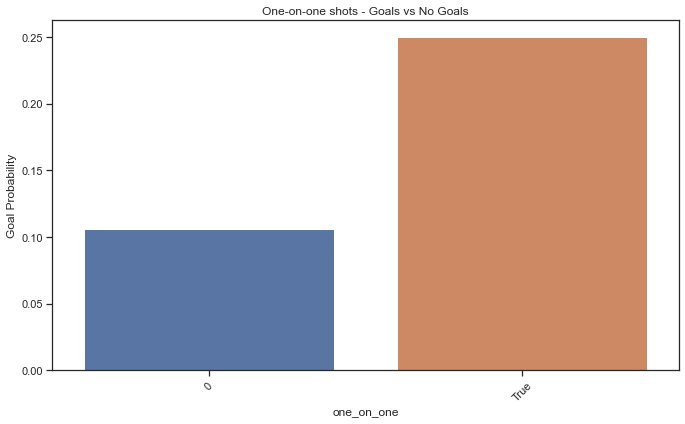

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x='one_on_one',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.title("One-on-one shots - Goals vs No Goals")
plt.ylabel('Goal Probability')

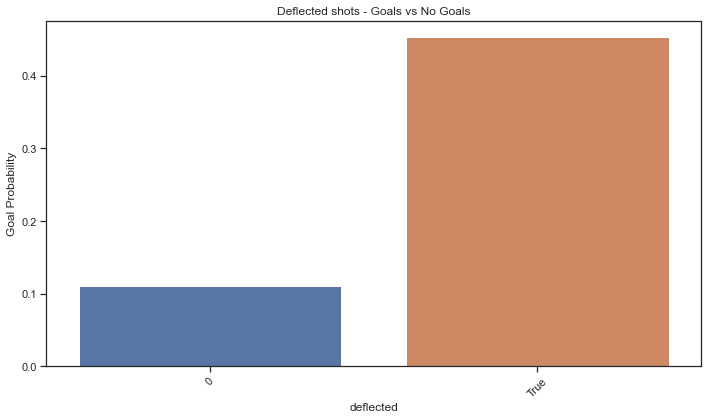

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='deflected',y='goal',ci=None,data=features)
plt.title("Deflected shots - Goals vs No Goals")
plt.xticks(rotation=45)
plt.ylabel('Goal Probability');

Text(0, 0.5, 'Goal Probability')

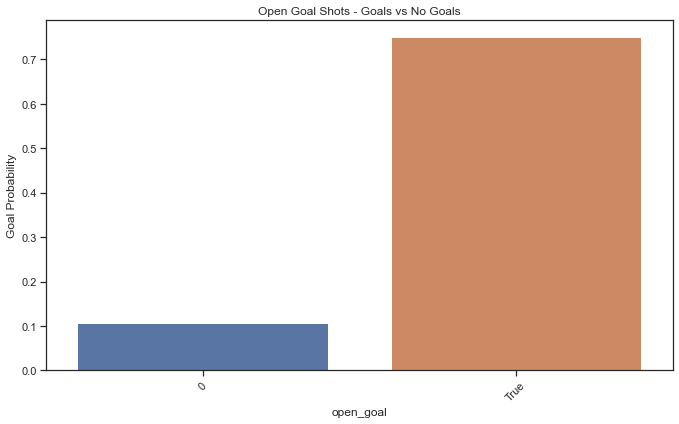

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x='open_goal',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.title("Open Goal Shots - Goals vs No Goals")
plt.ylabel('Goal Probability')

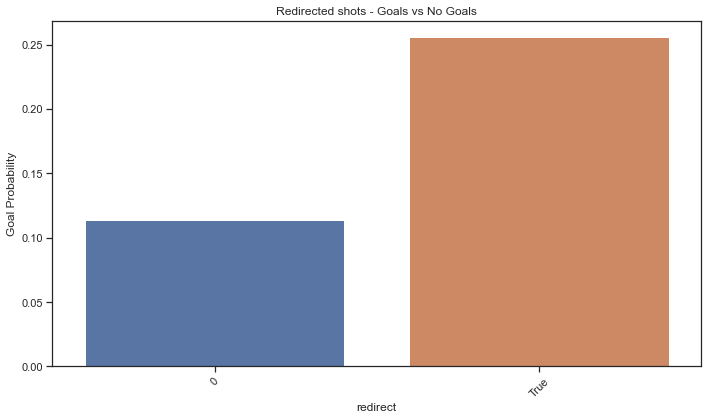

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='redirect',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.title("Redirected shots - Goals vs No Goals")
plt.ylabel('Goal Probability')

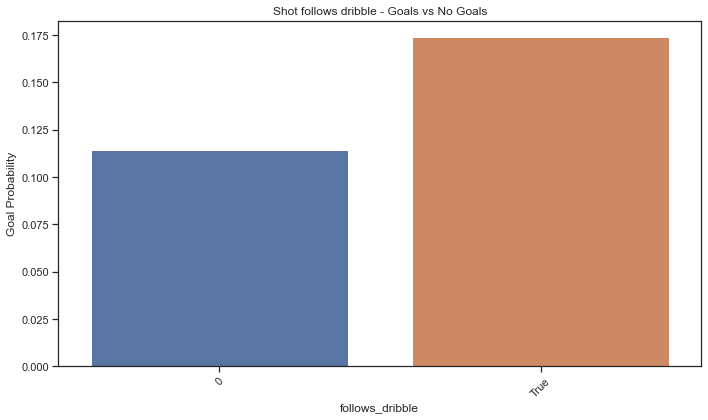

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x='follows_dribble',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.title("Shot follows dribble - Goals vs No Goals")
plt.ylabel('Goal Probability')

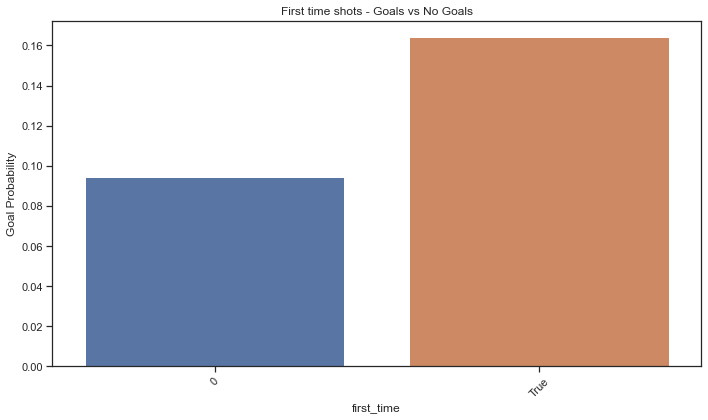

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='first_time',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.title("First time shots - Goals vs No Goals")
plt.ylabel('Goal Probability')

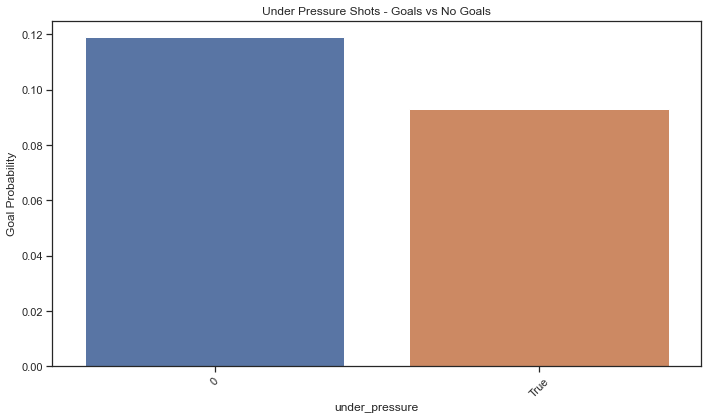

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x='under_pressure',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.title("Under Pressure Shots - Goals vs No Goals")
plt.ylabel('Goal Probability')

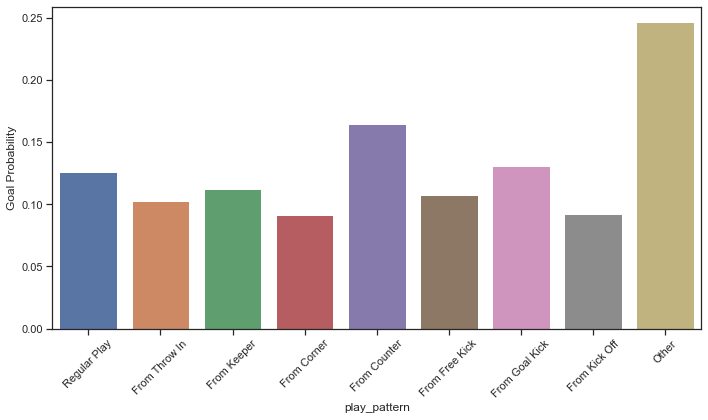

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x='play_pattern',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.ylabel('Goal Probability')

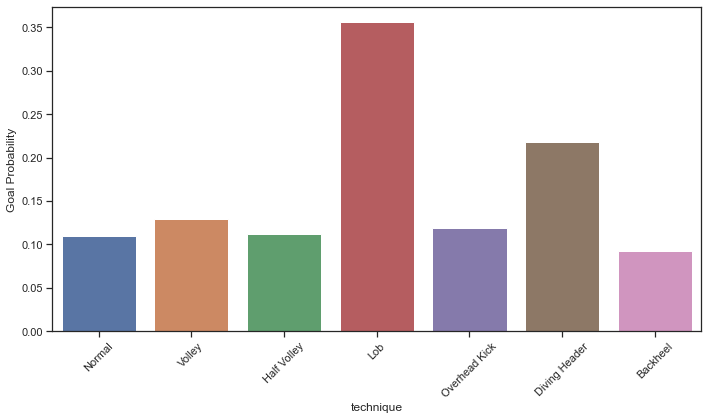

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='technique',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.ylabel('Goal Probability')

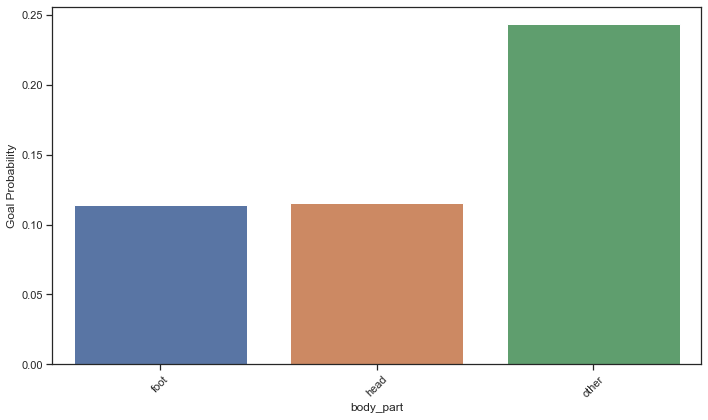

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='body_part',y='goal',ci=None,data=features)
plt.xticks(rotation=45)
plt.ylabel('Goal Probability')

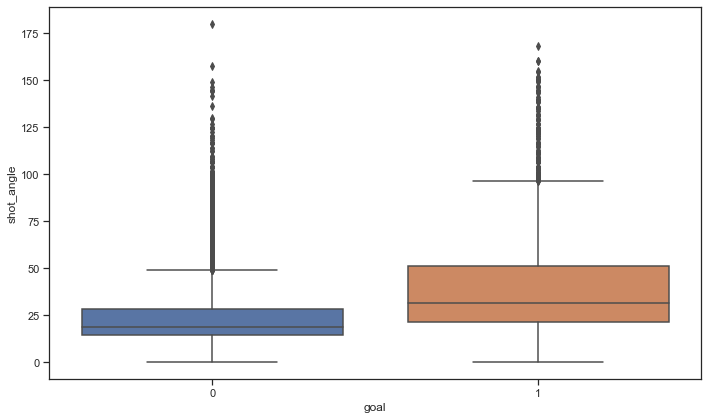

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x='goal',y='shot_angle',data=features)

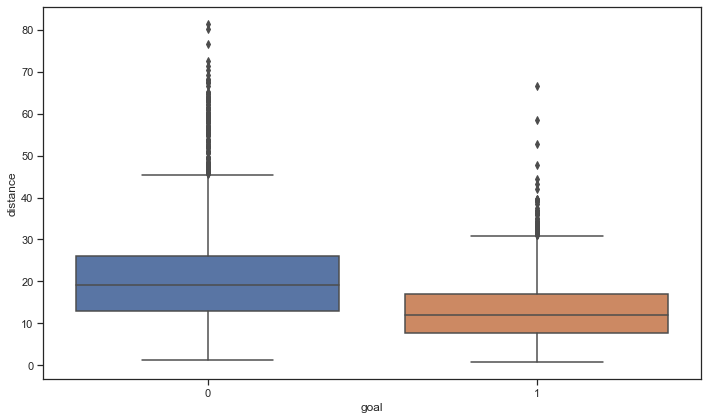

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='goal',y='distance',data=features)

## Combining Features

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Volley'),
  Text(2, 0, 'Half Volley'),
  Text(3, 0, 'Lob'),
  Text(4, 0, 'Overhead Kick'),
  Text(5, 0, 'Diving Header'),
  Text(6, 0, 'Backheel')])

<Figure size 720x432 with 0 Axes>

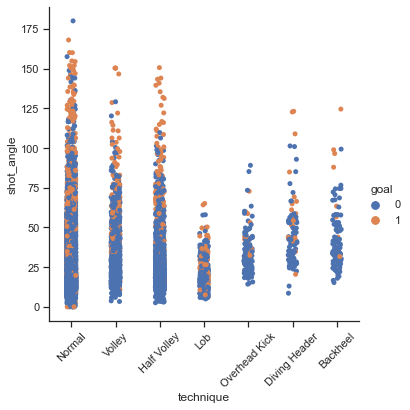

In [50]:
plt.figure(figsize=(10,6))
sns.catplot(x='technique',y='shot_angle',hue = 'goal',data=features);
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Volley'),
  Text(2, 0, 'Half Volley'),
  Text(3, 0, 'Lob'),
  Text(4, 0, 'Overhead Kick'),
  Text(5, 0, 'Diving Header'),
  Text(6, 0, 'Backheel')])

<Figure size 720x432 with 0 Axes>

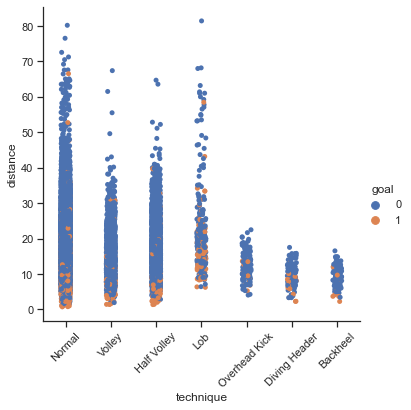

In [51]:
plt.figure(figsize=(10,6))
sns.catplot(x='technique',y='distance',hue = 'goal',data=features);
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Regular Play'),
  Text(1, 0, 'From Throw In'),
  Text(2, 0, 'From Keeper'),
  Text(3, 0, 'From Corner'),
  Text(4, 0, 'From Counter'),
  Text(5, 0, 'From Free Kick'),
  Text(6, 0, 'From Goal Kick'),
  Text(7, 0, 'From Kick Off'),
  Text(8, 0, 'Other')])

<Figure size 720x432 with 0 Axes>

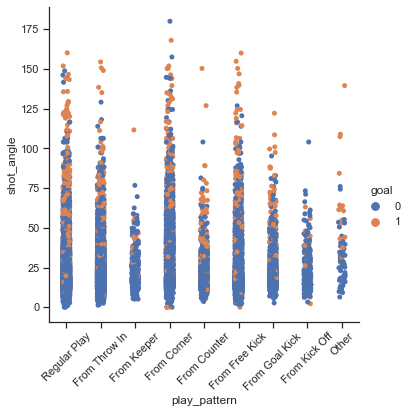

In [52]:
plt.figure(figsize=(10,6))
sns.catplot(x='play_pattern',y='shot_angle',hue = 'goal',data=features);
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Regular Play'),
  Text(1, 0, 'From Throw In'),
  Text(2, 0, 'From Keeper'),
  Text(3, 0, 'From Corner'),
  Text(4, 0, 'From Counter'),
  Text(5, 0, 'From Free Kick'),
  Text(6, 0, 'From Goal Kick'),
  Text(7, 0, 'From Kick Off'),
  Text(8, 0, 'Other')])

<Figure size 720x432 with 0 Axes>

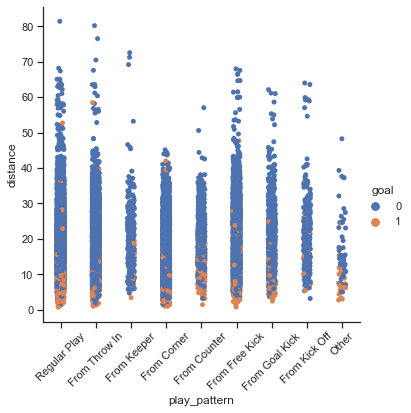

In [53]:
plt.figure(figsize=(10,6))
sns.catplot(x='play_pattern',y='distance',hue = 'goal',data=features);
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'foot'), Text(1, 0, 'head'), Text(2, 0, 'other')])

<Figure size 720x432 with 0 Axes>

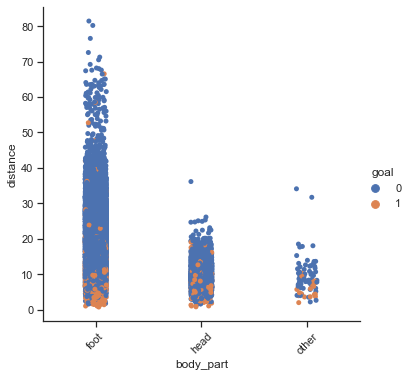

In [54]:
plt.figure(figsize=(10,6))
sns.catplot(x='body_part',y='distance',hue = 'goal',data=features);
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'foot'), Text(1, 0, 'head'), Text(2, 0, 'other')])

<Figure size 720x432 with 0 Axes>

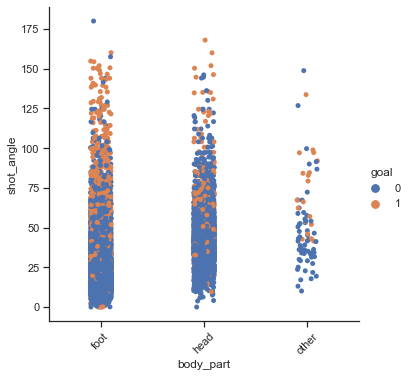

In [55]:
plt.figure(figsize=(10,6))
sns.catplot(x='body_part',y='shot_angle',hue = 'goal',data=features);
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Scatterplot: Angle vs Distance')

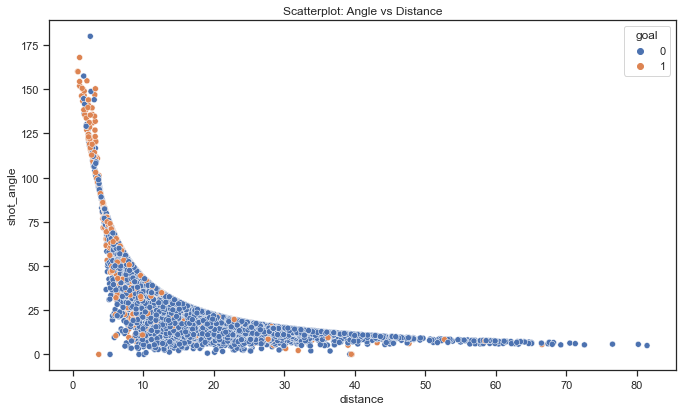

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance',y='shot_angle', hue = 'goal',data=features)
plt.title("Scatterplot: Angle vs Distance")

In [57]:
features

,play_pattern,under_pressure,body_part,technique,first_time,follows_dribble,redirect,one_on_one,open_goal,deflected,distance,shot_angle,goal
0,Regular Play,True,foot,Normal,0,0,0,0,0,0,28.270479,16.0,0
1,From Throw In,0,foot,Normal,0,0,0,0,0,0,35.503943,10.8,0
2,From Keeper,0,foot,Normal,0,0,0,0,0,0,25.824020,17.0,0
3,From Throw In,0,foot,Normal,0,0,0,0,0,0,20.718349,7.7,0
4,Regular Play,0,foot,Normal,0,0,0,0,0,0,29.167105,11.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27284,From Counter,0,foot,Normal,0,0,0,0,0,0,23.331095,16.6,0
27285,From Free Kick,0,foot,Normal,0,0,0,0,0,0,24.002708,18.7,0
27286,From Throw In,0,foot,Normal,0,0,0,0,0,0,26.622171,13.9,0
27287,From Throw In,True,foot,Half Volley,True,0,0,0,0,0,22.484884,15.6,0


In [58]:
correlation_matrix = features.corr()
correlation_matrix

,distance,shot_angle,goal
distance,1.000000,-0.734459,-0.240802
shot_angle,-0.734459,1.000000,0.291690
goal,-0.240802,0.291690,1.000000
